In [153]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd

In [156]:
csv_file = "VASASHData.csv"

In [157]:
data = pd.read_csv(csv_file,encoding='latin1')

In [158]:
data.columns

Index(['EIAannoID', 'ID', 'Match', 'Round', 'half', 'time',
       'Team in possession', 'possessionlabel', 'player', 'postion',
       'positiondetail', 'team', 'Action', 'Atr', 'LocX', 'LocY', 'Result',
       'Direction/type', 'distance', 'angle', 'DS', 'Season'],
      dtype='object')

In [159]:
data.dtypes

EIAannoID               int64
ID                      int64
Match                   int64
Round                   int64
half                    int64
time                  float64
Team in possession     object
possessionlabel        object
player                 object
postion                object
positiondetail         object
team                   object
Action                 object
Atr                    object
LocX                  float64
LocY                  float64
Result                 object
Direction/type         object
distance              float64
angle                 float64
DS                      int64
Season                float64
dtype: object

In [160]:
frame = pd.DataFrame(data)
#frame[data['team']=='Vancouver Whitecaps FC']

In [161]:
def allTargets(player_name,action):
    player_frame = frame[data['player']==player_name]
    pass_targets = dict()
    pass_count = 0
    for target in player_frame[player_frame['Action']==action]['Result']:
        if target in pass_targets:
            pass_targets[target] += 1
            pass_count += 1
        else:
            pass_targets[target] = 1
            pass_count += 1
    return pass_targets, pass_count


In [162]:
targets,tot_cnt = allTargets("Kendall Waston",'pass')

In [171]:
def actionFreq(action_dict,tot_cnt):
    freq_dict = dict()
    for player in targets:
        freq_dict[player] = float(targets[player])/tot_cnt
    return freq_dict

In [172]:
a_f = actionFreq(targets,tot_cnt)

In [183]:
def dict2List(dict_):
    L = []
    for key in dict_:
        if key != 'NotCompleted':
            L.append([dict_[key],key])
    L = L.sort()
    L_key = []
    L_ele = []
    for pair in L:
        
        else:
            L_key.append(key)
            L_ele.append(dict_[key])
    #L_key.append('Not Completed')
    #L_ele.append(not_comp)
    return L_key,L_ele

In [181]:
act_list,tar_list = dict2List(a_f)

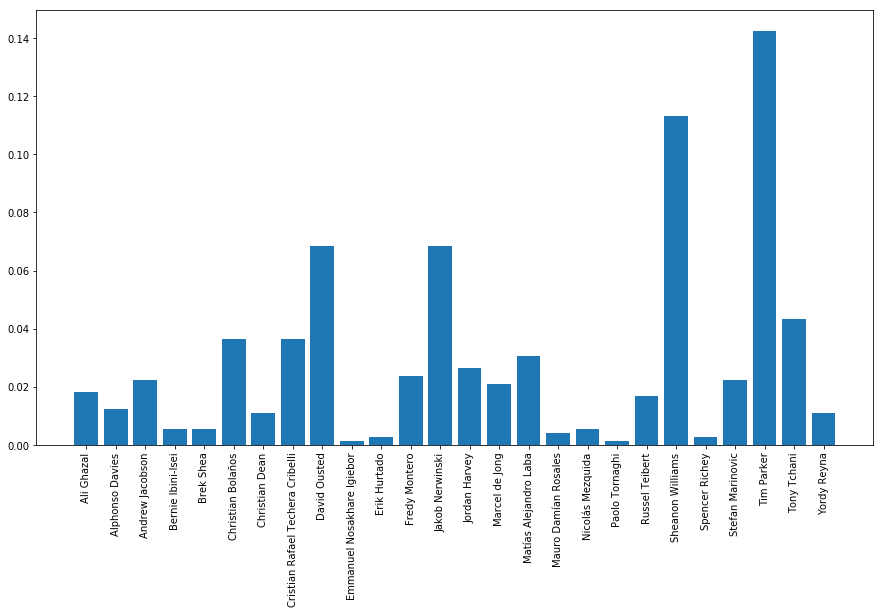

In [182]:
plt.figure(figsize=(15,8))
plt.xticks(rotation='vertical')
plt.bar(act_list,tar_list)
plt.show()

In [120]:
#print(frame.Team) #Or "frame['Team']"

#for i in range(0,890):
#    if frame.ix[i] #Looks at one row (player in this case) of data

#print("********************\n***** Describe *****\n********************")
#print(data.describe())

#print("************************\n***** Sort - Teams *****\n************************")
#print(data.sort_values(by="Team"))

#print("**********************\n***** Last Names *****\n**********************")
#print(data["Last Name"])

#print("***********************************\n***** Last Names, First Names *****\n***********************************")
#print(data.loc[:,['LastName','FirstName']])   # ".head()" shows the first 5 entries, similarly ".tail()" shows the last 5

#print("********************************\n***** First Player's Stats *****\n********************************")
#print(data.loc[0])

#print("***************************\n***** Players Over 6\" *****\n***************************")
#print(data[data.Ht > 72])

#print("********************************\n***** Mean of all sections *****\n********************************")
#print(data.mean())

#print("***************************************************\n***** Add all sections, but seperated by team *****\n***************************************************")
#print(data.groupby(["Team"]).sum())

#print("*************************************\n***** Restacks the data per Row *****\n*************************************")
#print(data.stack())

#print("*****************************\n***** Unstacks the data *****\n*****************************")
#print(data.unstack())

#print("*****************************\n***** Prints players with last name Marner *****\n*****************************")
#print(data['Last Name' == 'Marner'])


EIAannoID               int64
ID                      int64
Match                   int64
Round                   int64
half                    int64
time                  float64
Team in possession     object
possessionlabel        object
player                 object
postion                object
positiondetail         object
team                   object
Action                 object
Atr                    object
LocX                  float64
LocY                  float64
Result                 object
Direction/type         object
distance              float64
angle                 float64
DS                      int64
Season                  int64
dtype: object
